# First-Order Systems

## Required imports

In [1]:
from IPython.core.display import HTML
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 10,
})

from sympy import *
from sympy.plotting import plot
from sympy.abc import x, y

from mathprint import *

## Preparations

Define variables that we are going to use repetitively:
$s, t, \tau$.
We also need to define specific prpoperties of the variables.

In [2]:
t   = symbols('t', real=True)
s   = symbols('s', complex=True)
tau = symbols('tau', real=True)

The original laplace transformation functions are a little too long. We will simplify the laplace and the inverse laplace transformation functions, as follows.
*  ```laplace_transform(f, t, s, noconds=True)``` as ```laplace(f)```
*  ```inverse_laplace_transform(F, s, t)``` as ```ilapalce(F)```

In [3]:
def laplace(f):
    F = laplace_transform(f, t, s, noconds=True)
    return F

def ilaplace(F):
    f = inverse_laplace_transform(F, s, t)
    return f

## Special functions in SymPy

We will use these two special functions very often:
* $\delta(t)$ is an impulse function or a Dirac Delta function
* $\theta(t)$ is a step function or a Heaviside function

[We can find more information about these functions here](https://docs.sympy.org/latest/modules/functions/special.html).

## First-order system equation

A first-order system: 

In [4]:
G = 1 / (tau*s + 1)
mprint('G(s)=\\frac{C(s)}{R(s)}=', latex(G))

<IPython.core.display.Math object>

Here $R(s)$ and $C(s)$ are the input and output functions in $s$-domain, respectively. In time-domain, they become $r(t)$ and $c(t)$, respectively. The first order coefficient ( $\tau$ ) is better known as the time constant.

## Unit-impulse response

What we do here:
* define the input, which is a unit impulse function (Dirac Delta function)

In [5]:
r = DiracDelta(t)
mprint('r(t)=', latex(r))

<IPython.core.display.Math object>

* compute its Laplace form

In [6]:
R = laplace(r)
mprint('R(s)=', latex(R))


<IPython.core.display.Math object>

* apply the input to the sytem and obtain the output

In [7]:
C = G*R
mprint('C(s)=', latex(C))

<IPython.core.display.Math object>

* compute the inverse Laplace of the output

In [8]:
c = ilaplace(C)
mprint('c(t)=', latex(c))

<IPython.core.display.Math object>

For plotting the response, let us set $\tau = 1$.

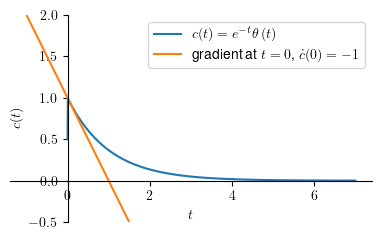

In [9]:
tau_ = 1
c1 = c.subs(tau, tau_)

p1 = plot(c1, (t, 0 , 7), ylim=[-0.5, 2], size=(4, 2.5), ylabel='$c(t)$', show=False, legend=True)
p2 = plot(-1/tau_**2*t + 1/tau_, (t, -1 , 7), show=False, legend=True)
p1[0].label = '$c(t)='+latex(c1)+'$'
p2[0].label = "gradient at $t=0$, $\\dot{c}(0)=-1$"
p1.append(p2[0])

p1.show() 

Two interesting informations that we can extract from the response plot above are: 
* output value at $t=0$ or $\lim_{t \to 0} c(t)$

In [10]:
limit(c, t, 0) # c(0)

1/tau

* output gradient at $t=0$ or $\lim_{t \to 0}\frac{\mathtt{d}c}{\mathtt{d}t}$

In [11]:
limit(diff(c, t), t, 0) # output gradient at t = 0

-1/tau**2

Thus we can summarize, for unit-impulse output $c(t)$:  
$$c(0) = \frac{1}{\tau}$$ and $$\dot{c}(0) = -\frac{1}{\tau^2}$$

## Unit-step response

What we do here:
* define the input, which is a unit step function (Heaviside function)

In [12]:
t   = symbols('t', real=True, positive=True)

r = Heaviside(t)
mprint('r(t)=', latex(r))

<IPython.core.display.Math object>

* compute its Laplace form

In [13]:
R = laplace(r)
mprint('R(s)=', latex(R))

<IPython.core.display.Math object>

* apply the input to the sytem and obtain the output

In [14]:
C = G*R
mprint('C(s)=', latex(C))

<IPython.core.display.Math object>

* compute the inverse Laplace of the output

In [15]:
c = ilaplace(C)
mprint('c(t)=', latex(c))

<IPython.core.display.Math object>

For plotting, let us set $\tau = 1$.

In [16]:
tau_ = 1
c1 = collect(c.subs(tau, tau_), Heaviside(t))
mprint("c(t)=", latex(c1))

<IPython.core.display.Math object>

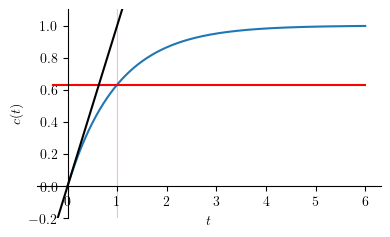

In [17]:
tend = 6
p1 = plot(c1,                   (t,  0,   tend), ylim=[-0.2, 1.1], size=(4, 2.5), ylabel='$c(t)$', show=False)
p2 = plot_implicit(Eq(t, tau_), (t, -0.1, tend), line_color='r',show=False)  # vertical line at t = tau
p3 = plot(c1.subs(t, tau_),     (t, -0.3, tend), line_color='r', show=False) # horizontal line at c(tau)
p4 = plot(tau_*t,               (t, -0.3, tend), line_color='k', show=False) # gradient at t = 0
p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.show()


The figure above shows that at $t = \tau$, $c(\tau)$ is at $63.21 \%$ of $c_{ss}$

* output value at $t=\tau$ or $c(\tau)$

In [18]:
c1.subs(t,tau) # c(t = tau)

1 - exp(-tau)

* output gradient at $t=0$ or $\lim_{t \to 0} \frac{\mathtt{d}c}{\mathtt{d}t}$

In [19]:
limit(diff(c, t), t, 0).evalf() # gradient at t = 0

1/tau

## Unit-ramp response

What we do here:
* define the input, which is a unit ramp function

In [20]:
r = t * Heaviside(t)
mprint('r(t)=', latex(r))

<IPython.core.display.Math object>

* compute its Laplace form

In [21]:
R = laplace(r)
mprint('R(s)=', latex(R))

<IPython.core.display.Math object>

* apply the input to the sytem and obtain the output

In [22]:
C = G*R
mprint('C(s)=', latex(C))

<IPython.core.display.Math object>

* compute the inverse Laplace of the output

In [23]:
c = collect(ilaplace(C), Heaviside(t))
mprint('c(t)=', latex(c))

<IPython.core.display.Math object>

For plotting, let us set $\tau = 1$.

In [24]:
tau_ = 1
c1 = collect(c.subs(tau, tau_), Heaviside(t))
mprint("c(t)=", latex(c1))

<IPython.core.display.Math object>

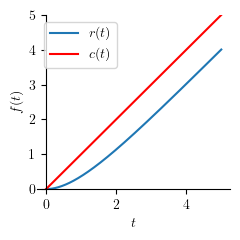

In [25]:
tend = 5
p1 = plot(c1, (t, 0, tend), ylim=[-0, 5], size=(2.5, 2.5), show=False, legend=True)
p2 = plot(r,  (t, 0, tend), line_color='r', show=False, legend=True)  
p1[0].label = '$r(t)$'
p2[0].label = '$c(t)$'
p1.append(p2[0])
p1.show()

As we can see from the response plot above, there is a constant difference between the input and the output (__vertical distance between red line and blue line__). This constant difference can ba expressed as:

$$\Delta = \lim_{s \to 0}  s\big(R(s)-C(s) \big) = \lim_{s \to 0} s \big(R(s)-GR(s) \big) = \lim_{s \to 0} sR(s) \big(1-G(s) \big) $$

In [26]:
delta = limit(s*laplace(r) * (1 - G), s, 0)
mprint('\\Delta=', latex(delta))

<IPython.core.display.Math object>